In [1]:
#Comenzaremos importanto las librerias necesarias.
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
import docplex.mp.solution as Solucion

Creando el modelo a resolver 

In [2]:
#Iniciando el modelo
mdl =Model('Final')

In [7]:
#Declaramos las variables a utilizar
#los nombre y forma de llamar las variables es propia de CPLEX.

x=mdl.binary_var_dict(arcos,name='x')
d=mdl.continuous_var_dict(jobs,name='d')

Creando las restricciones 

∑∀i∈Ciudadesxi=1

∑∀j∈Ciudadesxj=1

ci+1≥cj+M(1−xij)

In [8]:
# Primero restricción sumatoria para todo i
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if i==c)==1, 
                       ctname='out_%d'%c)
# Segundo restricción sumatoria para todo j
for c in ciudades:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in arcos if j==c)==1, 
                       ctname='in_%d'%c)


In [9]:
# Por último restricción lógica
for i,j in arcos:
    if j!=0:
        mdl.add_indicator(x[(i,j)],d[i]+1==d[j], 
                          name='order_(%d,_%d)'%(i, j))

 Función objetivo del TPS


MinZ=∑∀A xij*cij

In [12]:
mdl.minimize(mdl.sum(distancia[i]*x[i] for i in arcos))

In [13]:
#print(mdl.export_to_string())

In [14]:
mdl.parameters.timelimit=120
mdl.parameters.mip.strategy.branch=1
mdl.parameters.mip.tolerances.mipgap=0.15

solucion = mdl.solve(log_output=True)

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
CPXPARAM_MIP_Strategy_Branch                     1
CPXPARAM_TimeLimit                               120
CPXPARAM_MIP_Tolerances_MIPGap                   0.14999999999999999
Tried aggregator 2 times.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 77 rows, 176 columns, and 385 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 100 indicators.
Presolve time = 0.09 sec. (0.32 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 77 rows, 176 columns, and 385 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 100 indicators.
Presolve time = 0.00 sec. (0.25 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Clique table members: 67.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic searc

In [15]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [16]:
solucion.display()

solution for: TSP
objective: 310.621
x_0_8 = 1
x_1_3 = 1
x_2_10 = 1
x_3_7 = 1
x_4_2 = 1
x_5_6 = 1
x_6_4 = 1
x_7_5 = 1
x_8_1 = 1
x_9_0 = 1
x_10_9 = 1
d_1 = 2.000
d_2 = 8.000
d_3 = 3.000
d_4 = 7.000
d_5 = 5.000
d_6 = 6.000
d_7 = 4.000
d_8 = 1.000
d_9 = 10.000
d_10 = 9.000


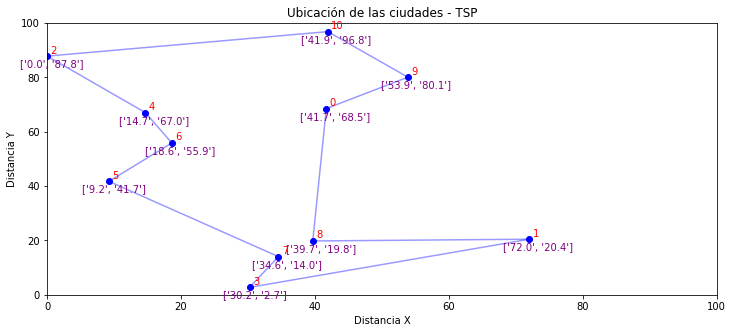

In [17]:


#Imprimiento la solución óptima.

plt.figure(figsize=(12,5))
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - TSP")


arcos_activos = [i for i in arcos if x[i].solution_value > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='blue', zorder=1)
    
for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]-4,coord_y[n]-4), color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), 
                 xytext=(coord_x[n]+0.5,coord_y[n]+1),color='red')
    
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()

